In [1]:
import numpy as np
import matplotlib.pyplot as plt

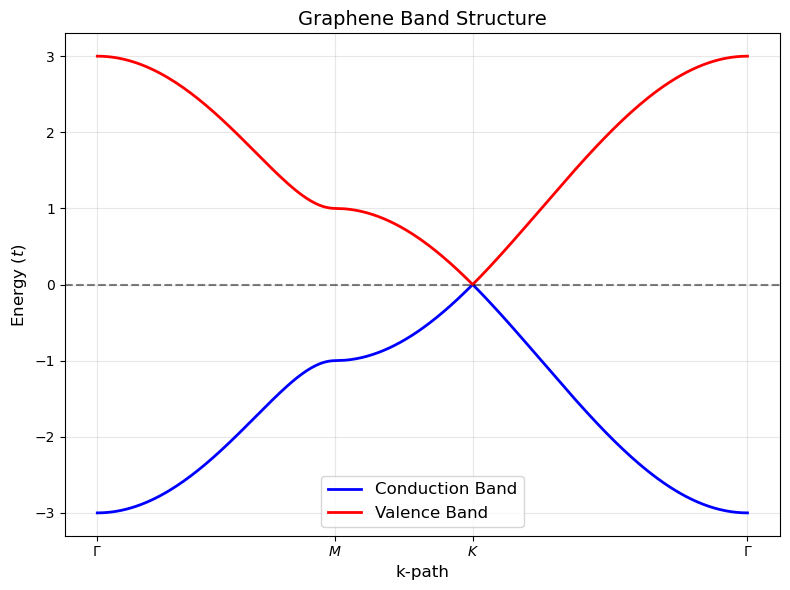

In [ ]:
# Parameters
a=1
t=1

# Defining the High Symmetry points
Gamma=np.array([0,0])
K=(2*np.pi/(3*a))*np.array([1, 1/np.sqrt(3)])
M=(2*np.pi/(3*a))*np.array([1,0])

# K-path: Γ → M → K → Γ (100 points each segment)
N=100
k_path = np.vstack([
    np.linspace(Gamma, M, N),
    np.linspace(M, K, N),
    np.linspace(K, Gamma, N)
])
k_path

# Compute distances for x-axis
k_dist = np.cumsum(np.sqrt(np.sum(np.diff(k_path, axis=0)**2, axis=1)))
k_dist = np.insert(k_dist, 0, 0.0)


def Hamiltonian(kx,ky):
    delta1=np.array([1,0])
    delta2=np.array([-0.5,np.sqrt(3)/2])
    delta3=np.array([-0.5,-np.sqrt(3)/2])

     # Hopping terms
    f = np.exp(1j * np.dot([kx, ky], delta1)) + \
        np.exp(1j * np.dot([kx, ky], delta2)) + \
        np.exp(1j * np.dot([kx, ky], delta3))
    return np.array([[0,-t*np.conj(f)],
                    [-t*f,0]])

# Compute eigenvalues
energies = np.array([np.linalg.eigvalsh(Hamiltonian(k[0], k[1])) for k in k_path])

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(k_dist, energies[:, 0], 'b-', linewidth=2, label='Conduction Band')
plt.plot(k_dist, energies[:, 1], 'r-', linewidth=2, label='Valence Band')
plt.axhline(0, color='k', linestyle='--', alpha=0.5)

# Label high-symmetry points
xticks = [k_dist[0], k_dist[N-1], k_dist[2*N-1], k_dist[-1]]
plt.xticks(xticks, [r'$\Gamma$', r'$M$', r'$K$', r'$\Gamma$'])
plt.ylabel(r'Energy ($t$)', fontsize=12)
plt.xlabel('k-path', fontsize=12)
plt.title('Graphene Band Structure', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



In [19]:
import numpy as np
import plotly.graph_objects as go

# Constants
a = 1
t = 1
N = 250  # Resolution

# Reciprocal space grid
kx_vals = np.linspace(-2*np.pi/a, 2*np.pi/a, N)
ky_vals = np.linspace(-2*np.pi/a, 2*np.pi/a, N)
kx, ky = np.meshgrid(kx_vals, ky_vals)

# Nearest neighbor vectors
delta1 = a * np.array([1.0, 0.0])
delta2 = a * np.array([-0.5, np.sqrt(3)/2])
delta3 = a * np.array([-0.5, -np.sqrt(3)/2])

# Tight-binding term f(k)
f_k = (
    np.exp(1j * (kx * delta1[0] + ky * delta1[1])) +
    np.exp(1j * (kx * delta2[0] + ky * delta2[1])) +
    np.exp(1j * (kx * delta3[0] + ky * delta3[1]))
)

E_plus = t * np.abs(f_k)
E_minus = -t * np.abs(f_k)

# High-symmetry points in k-space
G = [0, 0]
K = (2*np.pi / (3*a)) * np.array([1, 1/np.sqrt(3)])
M = (np.pi / a) * np.array([1, 1/np.sqrt(3)])

# Brillouin zone hexagon (regular)
R = 4 * np.pi / (3 * a)
hex_angles = np.linspace(0, 2 * np.pi, 7)
bz_hex_x = R * np.cos(hex_angles + np.pi/6)
bz_hex_y = R * np.sin(hex_angles + np.pi/6)

# Plot
fig = go.Figure()

# Conduction band
fig.add_trace(go.Surface(
    z=E_plus, x=kx, y=ky,
    colorscale='viridis',
    name='Conduction Band',
    showscale=False,
    opacity=0.9
))

# Valence band
fig.add_trace(go.Surface(
    z=E_minus, x=kx, y=ky,
    colorscale='Plasma',
    name='Valence Band',
    showscale=False,
    opacity=0.9
))

# Brillouin zone hexagon
fig.add_trace(go.Scatter3d(
    x=bz_hex_x, y=bz_hex_y, z=[0]*len(bz_hex_x),
    mode='lines',
    line=dict(color='black', width=4),
    name='1st Brillouin Zone'
))

# High-symmetry point labels
fig.add_trace(go.Scatter3d(
    x=[G[0], K[0], M[0]],
    y=[G[1], K[1], M[1]],
    z=[0, 0, 0],
    mode='text',
    text=['Γ', 'K', 'M'],
    textposition='top center',
    textfont=dict(size=20, color='black'),
    showlegend=False
))

# Final layout
fig.update_layout(
    title='Graphene Band Structure (Interactive 3D) + Brillouin Zone',
    scene=dict(
        xaxis_title='kₓ',
        yaxis_title='kᵧ',
        zaxis_title='Energy',
        zaxis=dict(range=[-3, 3]),
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    showlegend=True
)

fig.show()
